## Supplementary figure: percolation of defects

In [21]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
col1 = plt.cm.twilight(0.2)
col2 = plt.cm.twilight(0.65)
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


### Single flip squared
- todo: check dynamics coincide with eignstate

In [22]:
# .trash
# latt = Lattice2D(side1=16, 
#                  geo='squared', 
#                  pbc=True)
# latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
# latt.compute_k_eigvV()
# G_edges_ww = latt.G.edges(data='weight')

# col1 = plt.cm.twilight(0.2)
# col2 = plt.cm.twilight(0.65)

# edgecol = ['lightblue' if e[2] > 0 else 'red' for e in G_edges_ww]
# #
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_aspect('equal');
# cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
# custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)

# kwnxdraw = dict(ax=ax, pos=latt.posG,
#                 cmap=custom_cmap,
#                 edge_color=edgecol, 
#                 node_size=100, 
#                 node_color=-np.abs(latt.eigV[0]), 
#                 width=2)

# nx.draw(latt.G, **kwnxdraw)
# fig.savefig(f"{figpath}{latt.geo}_singleflip.pdf", 
#             bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close('all')

In [23]:
lattices = {}
geometry = 'squared'
cell = 'single'
sizes = 2**np.arange(3, 10)
#
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geo = geometry,
        sgpath='plot/paper/suppinf/'
    )
    if cell == 'single':
        flipdict = lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H
    elif cell == 'square':
        ff = list(lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][1]
        flipdict = lattices[side].neg_weights_dict.get_neg_weights_dict_h_square(ff)
    lattices[side].flip_sel_edges(flipdict)
    #
    eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
    #
    if os.path.exists(eigvpath):
        print(f"reading {side}", end="\r")
        setattr(lattices[side], 'eigV', np.load(eigvpath))
        continue
    else:
        print(f"computing {side}", end="\r")
        lattices[side].compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

(-0.5, 63.5, -0.5, 63.5)

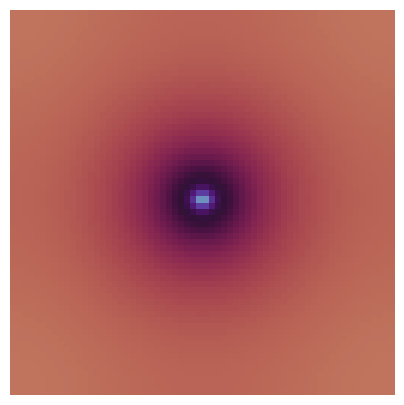

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
im = ax.imshow(unravel_1d_to_2d_nodemap(lattices[sizes[3]].eigV[0], lattices[sizes[3]].invnode_map), cmap=custom_cmap)
ax.axis('off')

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_\parallel)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = flip_to_positive_majority(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[:, lattices[side].side1//2]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .6*np.log(np.abs(x))+1.5, c='red', label=r'$a\log(x) + b$')
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattices[sizes[0]].r_c, +lattices[sizes[0]].r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(\bar{x}_\perp,\, y)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$y$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .6*np.log(np.abs(x))+1.5, c='red', label=r'$a\log(x) + b$')
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattices[sizes[0]].r_c, +lattices[sizes[0]].r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

### Single flip triangle

In [7]:
# .trash
# side1 = 5
# latt = Lattice2D(side1 = side1,
#                  geo='triangular',
#                  pbc=False)

# latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
# # latt.flip_random_fract_edges()

# G_edges_ww = latt.G.edges(data='weight')
# edgecol = ['lightblue' if e[2] > 0 else 'r' for e in G_edges_ww]
# latt.compute_k_eigvV()

# custom_colormap = create_custom_colormap('red', 'lightblue', 256)

# metrics = latt.eigV[0]

# norm = plt.Normalize(vmin=metrics.min(), vmax=metrics.max())

# fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_aspect('equal');
# cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
# custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)

# kwnxdraw = dict(ax=ax, pos=latt.posG,
#                 cmap=custom_cmap,
#                 edge_color=edgecol, 
#                 node_size=60, 
#                 node_color=-np.abs(latt.eigV[0]), 
#                 width=2)

# nx.draw(latt.G, **kwnxdraw)
# fig.savefig(f"{figpath}{latt.geo}_singleflip.pdf", 
#             bbox_inches='tight', transparent=True, pad_inches=0)
# # Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=custom_colormap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Metric Value', rotation=270, labelpad=20)





# def nodelist_mkr(lattice, cent = None):
#     inc = 0
#     inc2 = 0
#     if not cent:
#         cent = lattice.invnode_map[list(lattice.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][0]]
#     nodelist = [cent]
#     for i in range(1, lattice.side1//2):
#         if i % 2:
#             inc += 1
#         else:
#             inc2 += 1
#         add = inc
#         addv = inc2
#         nodedown = (cent[0] + add, cent[1] - i)
#         nodeup = (cent[0] - addv, cent[1] + i)
#         nodelist.append(nodeup)
#         nodelist.append(nodedown)
#     nodelist = [[i[0], i[1]] for i in sorted(nodelist, key=lambda x: x[1])]
#     return np.array(nodelist)
# nodelist_mkr(lattices[16], (5, 5))

In [8]:
lattices = {}
geometry = 'triangular'
cell = 'single'
#
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geo = geometry,
        sgpath='plot/paper/suppinf/'
    )
    if cell == 'single':
        flipdict = lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H
    elif cell == 'triangle':
        ff = list(lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][1]
        flipdict = lattices[side].neg_weights_dict.get_neg_weights_dict_h_triangle(ff)
    lattices[side].flip_sel_edges(flipdict)
    #
    eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
    #
    if os.path.exists(eigvpath):
        print(f"reading {side}", end="\r")
        setattr(lattices[side], 'eigV', np.load(eigvpath))
        continue
    else:
        print(f"computing {side}", end="\r")
        lattices[side].compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

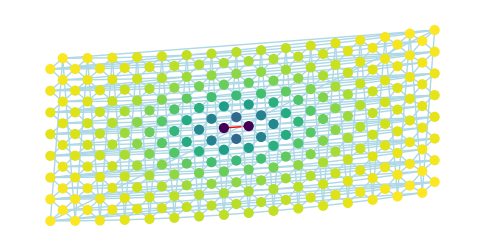

In [9]:
side = 16
G = lattices[side].G
node_color = lattices[side].eigV[0]
edge_color = ['lightblue' if e[2] > 0 else 'red' for e in G.edges(data='weight')]
#
fig, ax = plt.subplots(figsize=(6, 3))
nx.draw(G, ax=ax, pos = nx.get_node_attributes(G, 'pos'), 
        edge_color=edge_color, node_color=node_color, node_size=40)

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_{\parallel})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
r_c = lattices[side].r_c
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}
    eigen_state = unravel_1d_to_2d_nodemap(np.abs(lattices[side].eigV[0]), lattices[side].invnode_map)
    

    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]#[indices[:, 0], indices[:, 1]]#[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
#
    
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .35*np.log(np.abs(x))+1.3, c='red', label=r'$a\log(x) + b$')

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -r_c, +r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_{\perp})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
r_c = lattices[side].r_c
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}
    eigen_state = unravel_1d_to_2d_nodemap(np.abs(lattices[side].eigV[0]), lattices[side].invnode_map)
    

    phi_plot = (eigen_state/np.min(eigen_state))[:,lattices[side].side2//2]#[indices[:, 0], indices[:, 1]]#[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .35*np.log(np.abs(x))+1.3, c='red', label=r'$a\log(x) + b$')
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -r_c, +r_c]:
    ax.axvline(i, **kwvlines)
#
    

fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

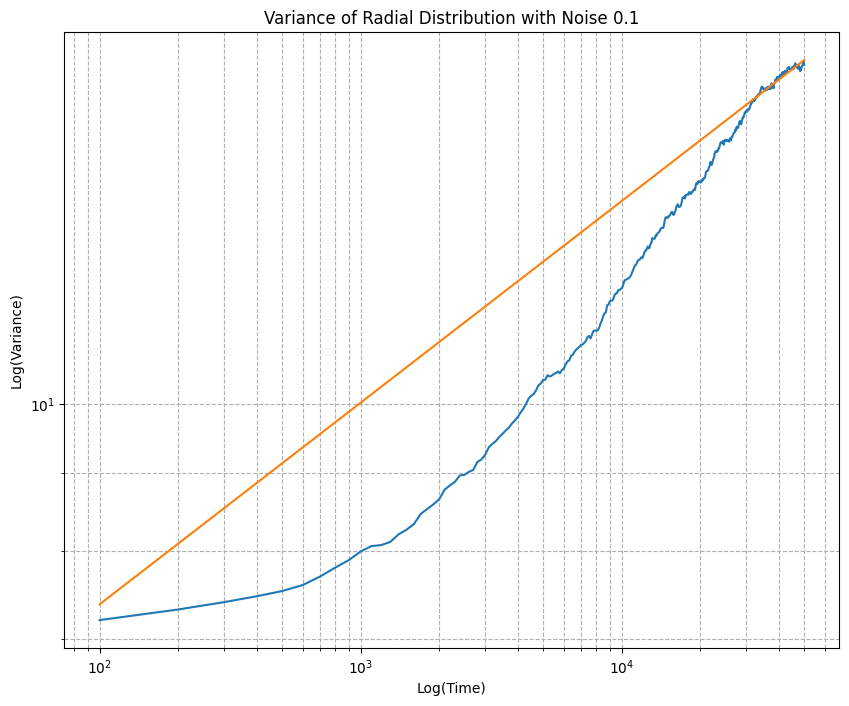

Exponent for standard deviation with initial noise: 0.13326466613977306
Exponent for standard deviation with reduced noise: -0.0018983493068070502


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters
N = 1000  # Number of particles
lattice_size = 50  # Size of the 2D lattice
kq = 1  # Combined constant for simplicity
dt = 0.01  # Time step for the simulation
noise_strength_initial = 0.1  # Initial noise strength

# Function definitions
def power_law(x, a, b):
    """Power-law function a * x^b."""
    return a * np.power(x, b)

# Simulation with a function to adjust noise and capture variance over time
def run_simulation(noise_strength):
    positions = (np.random.rand(N, 2) * (lattice_size - 1) - (lattice_size - 1) / 2)
    positions[np.linalg.norm(positions, axis=1) < 1] += 1

    variances = []
    times = []

    for step in range(1, 50001):
        r = np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)
        force_direction = -positions / r[:, None]
        force_magnitude = kq / r
        force_magnitude[r < 0.1] = 0

        acceleration = force_magnitude[:, None] * force_direction
        random_noise = noise_strength * np.random.randn(N, 2)
        positions += acceleration * dt + random_noise

        if step % 100 == 0:
            variance = np.var(r)
            variances.append(variance)
            times.append(step)
    
    return times, variances

# Run simulation with initial noise strength
times_initial, variances_initial = run_simulation(noise_strength_initial)

# Calculate and fit standard deviation from initial variance
std_dev_initial = np.sqrt(variances_initial)
params_std_initial, _ = curve_fit(power_law, times_initial[300:], std_dev_initial[300:])
exponent_std_initial = params_std_initial[1]

# Reduce noise strength and run simulation again
noise_strength_reduced = noise_strength_initial / 2
times_reduced, variances_reduced = run_simulation(noise_strength_reduced)

# # Calculate and fit standard deviation from reduced variance
std_dev_reduced = np.sqrt(variances_reduced)
params_std_reduced, _ = curve_fit(power_law, times_reduced, std_dev_reduced)
exponent_std_reduced = params_std_reduced[1]

# Plotting
# Variance with time for reduced noise
plt.figure(figsize=(10, 8))
plt.loglog(times_initial, std_dev_initial)
plt.loglog(times_initial, power_law(times_initial, *params_std_initial))

plt.title(f'Variance of Radial Distribution with Noise {noise_strength_initial}')
plt.xlabel('Log(Time)')
plt.ylabel('Log(Variance)')
plt.grid(True, which="both", ls="--")
plt.show()

# Exponents output
print(f"Exponent for standard deviation with initial noise: {exponent_std_initial}")
print(f"Exponent for standard deviation with reduced noise: {exponent_std_reduced}")


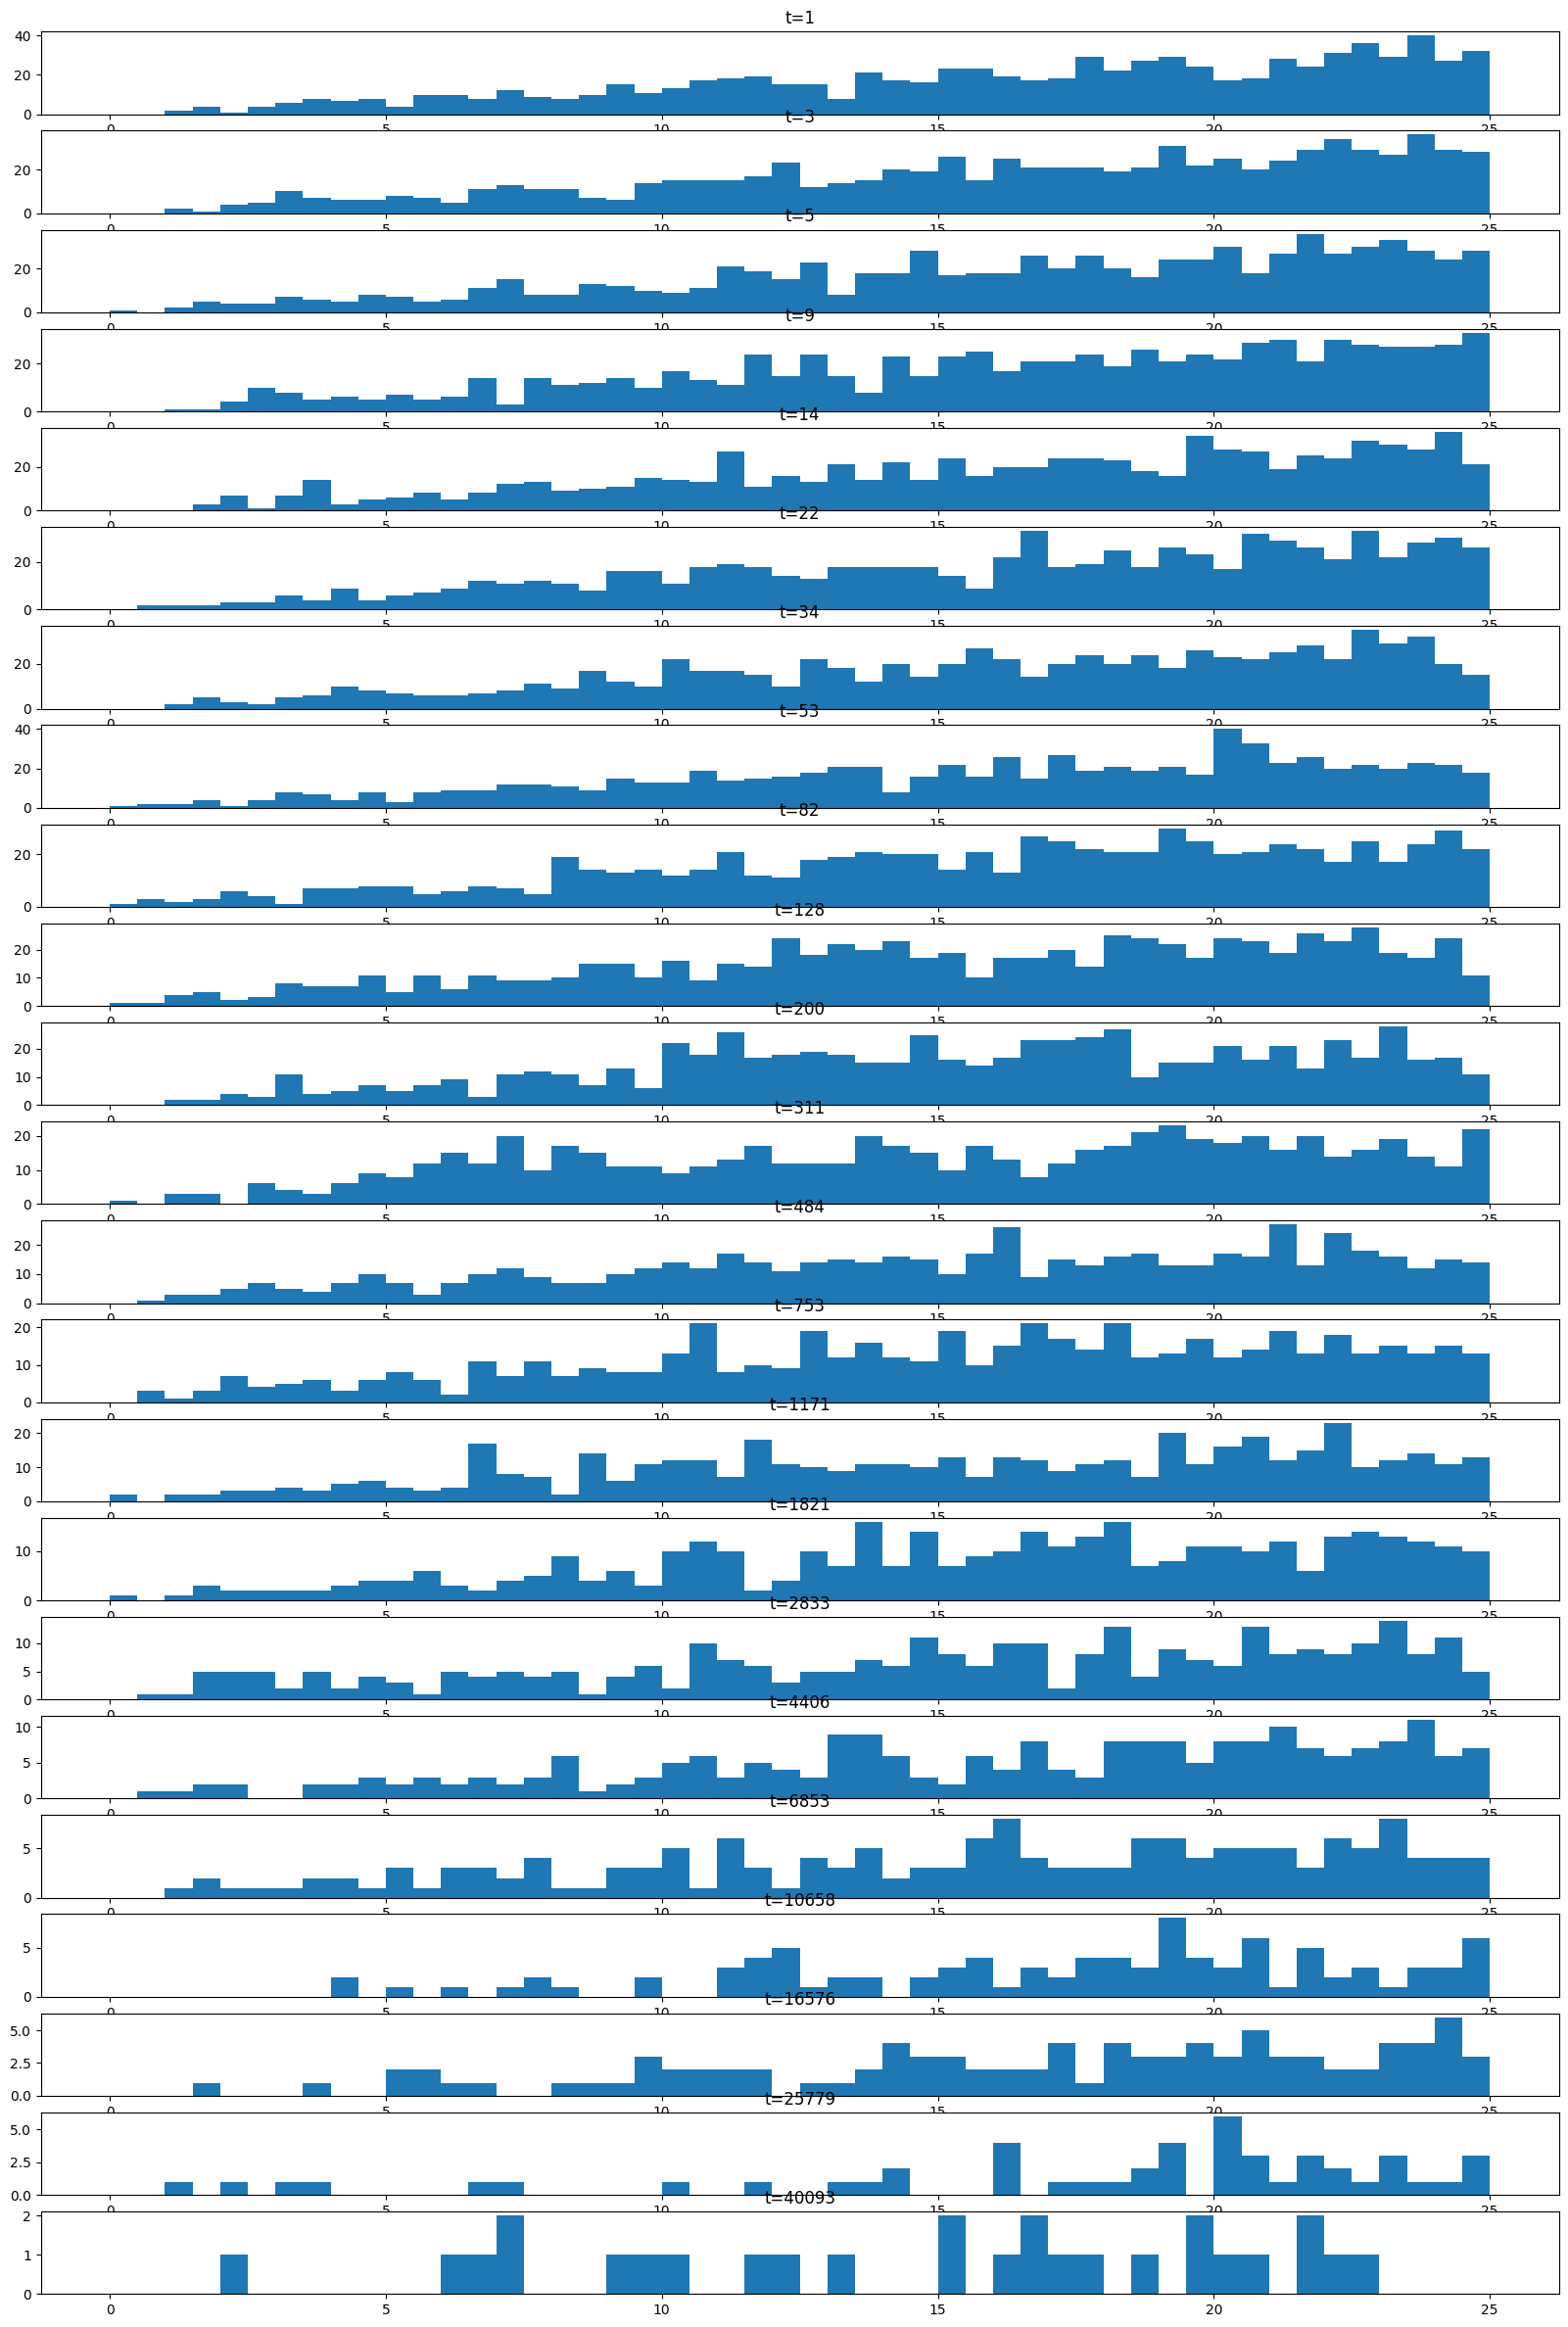

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N = 1000
lattice_size = 50
kq = 1
dt = 0.01
noise_strength = 0.5
positions_store = {}

def run_simulation_and_store_positions(noise_strength, store_times):
    positions = np.random.rand(N, 2) * (lattice_size - 1) - (lattice_size - 1) / 2
    positions[np.linalg.norm(positions, axis=1) < 1] += 1

    for step in range(1, 50001):
        r = np.linalg.norm(positions, axis=1)
        force_direction = -positions / r[:, None]
        force_magnitude = kq / r
        force_magnitude[r < 0.1] = 0
        acceleration = force_magnitude[:, None] * force_direction
        random_noise = noise_strength * np.random.randn(N, 2)
        positions += acceleration * dt + random_noise

        if step in store_times:
            positions_store[step] = positions.copy()

store_times = np.unique(np.logspace(np.log10(1), np.log10(50000), num=50).astype(int))
run_simulation_and_store_positions(noise_strength, store_times)

def plot_radial_distribution_at_times(times):
    fig, axs = plt.subplots(len(times), 1, figsize=(20, 30))
    if len(times) == 1:
        axs = [axs]
    for i, time in enumerate(times):
        positions = positions_store[time]
        r = np.linalg.norm(positions, axis=1)
        axs[i].hist(r, bins=50, range=(0, lattice_size/2))
        axs[i].set_title(f't={time}')
    plt.show()

plot_radial_distribution_at_times(store_times[::2])


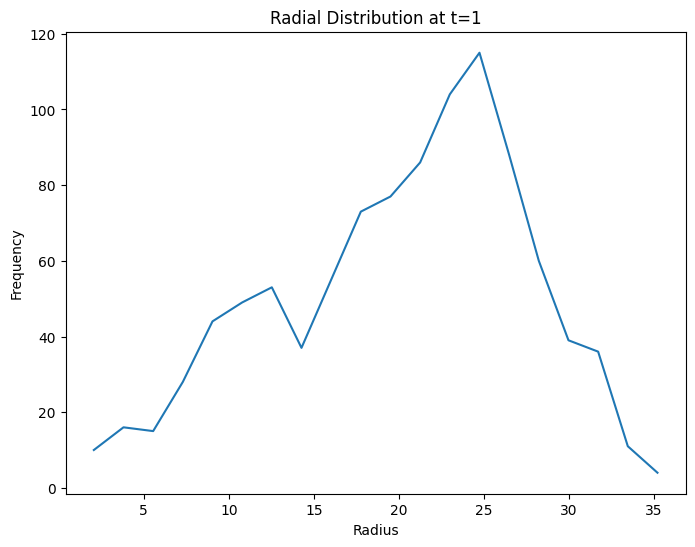

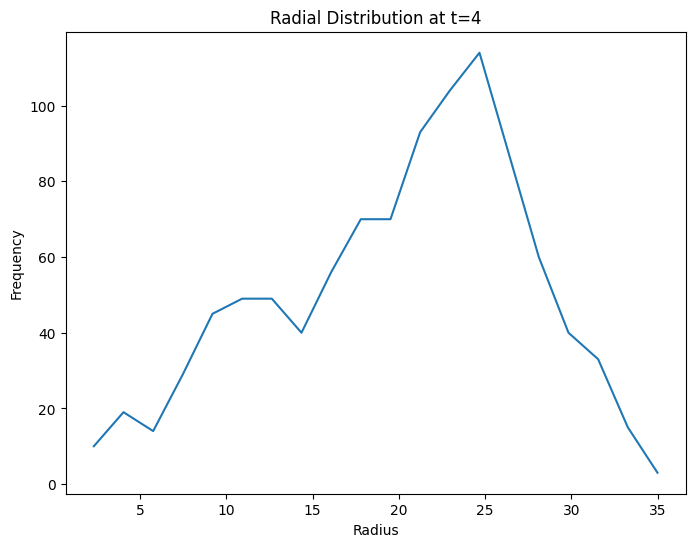

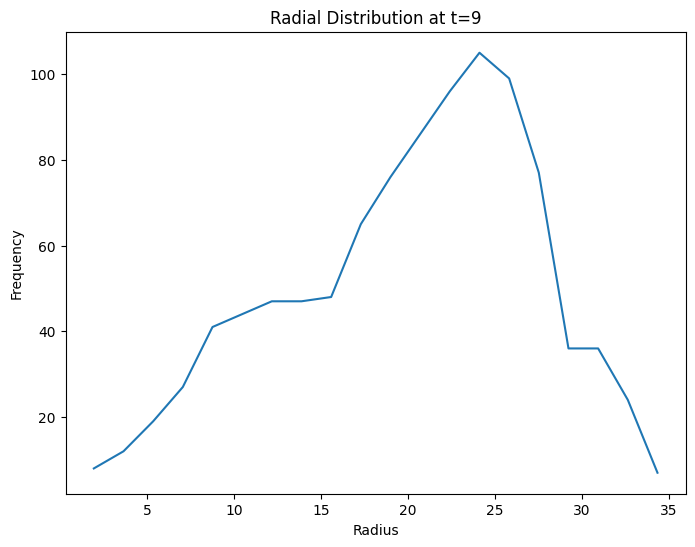

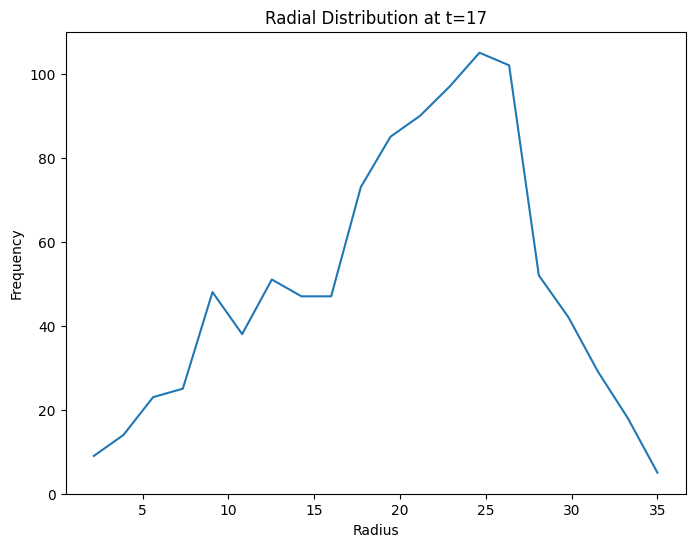

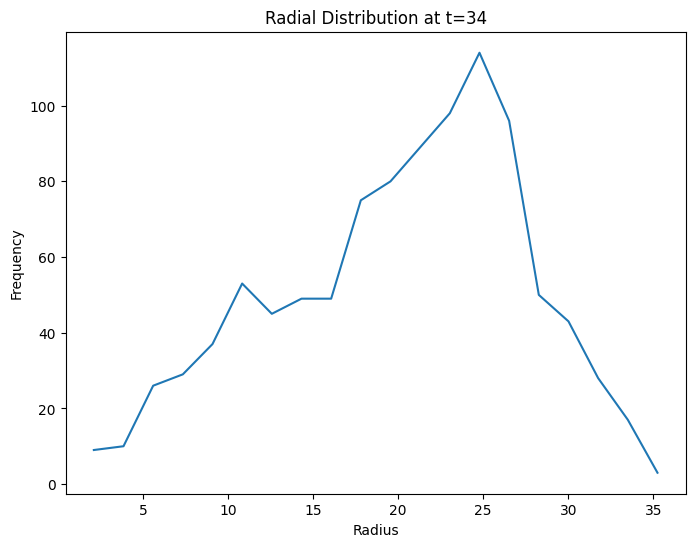

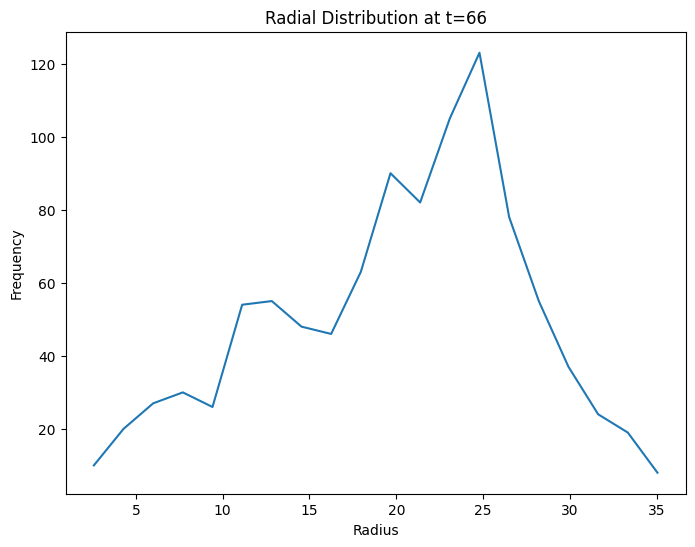

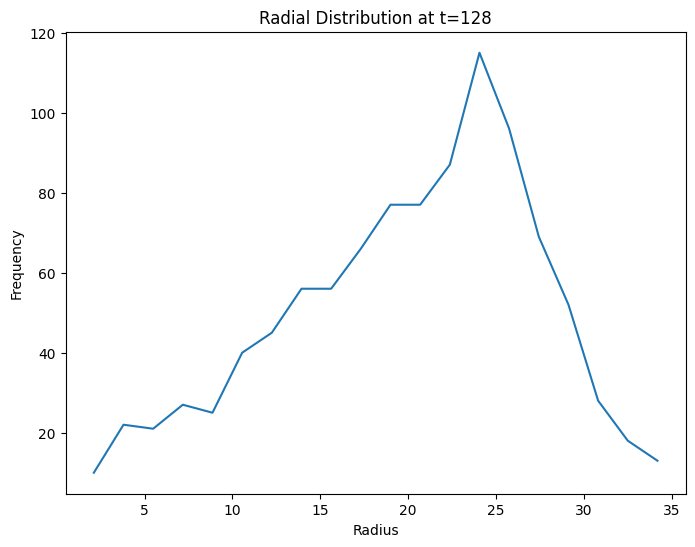

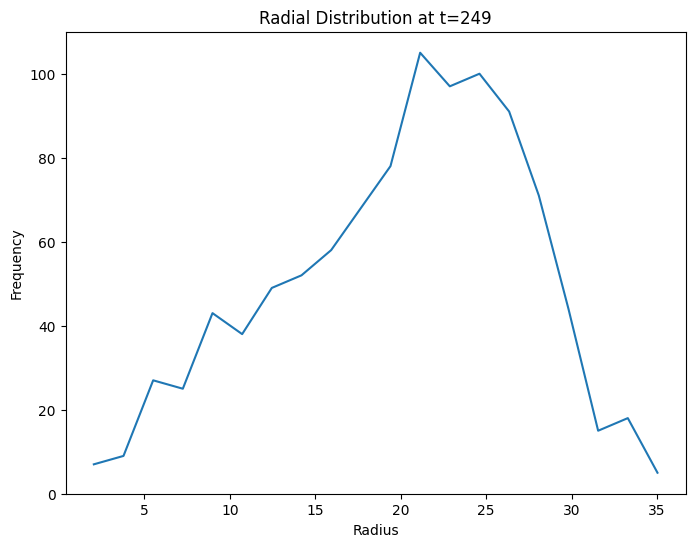

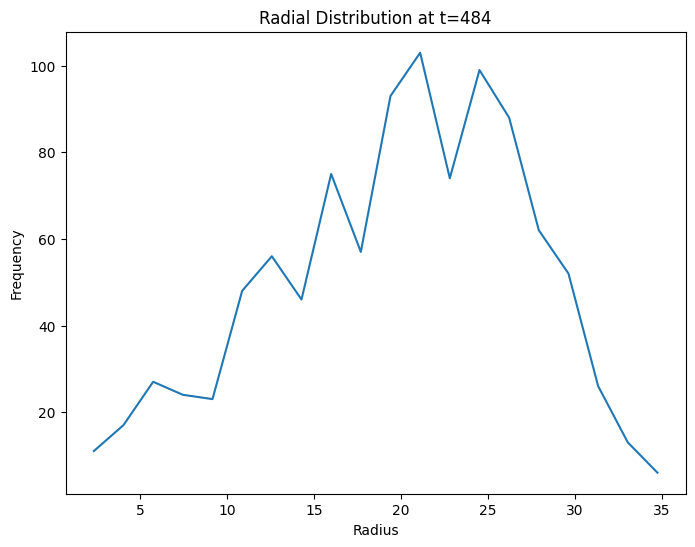

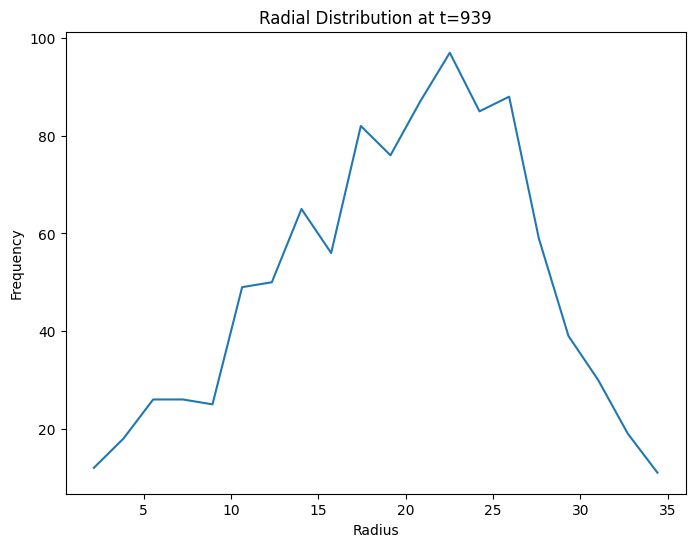

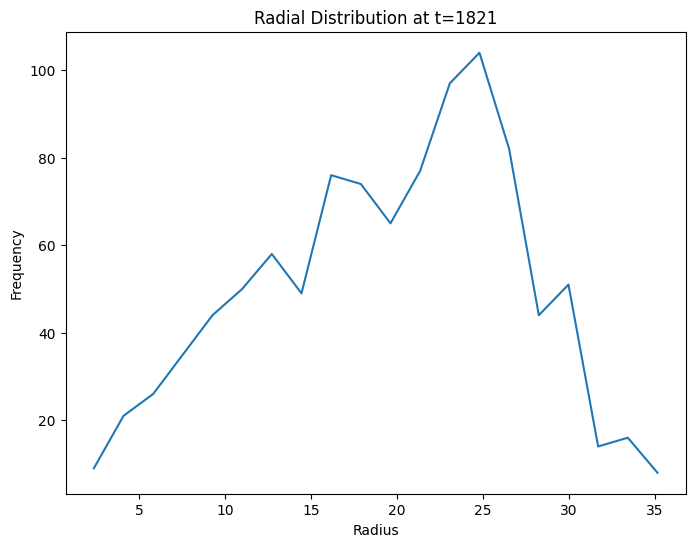

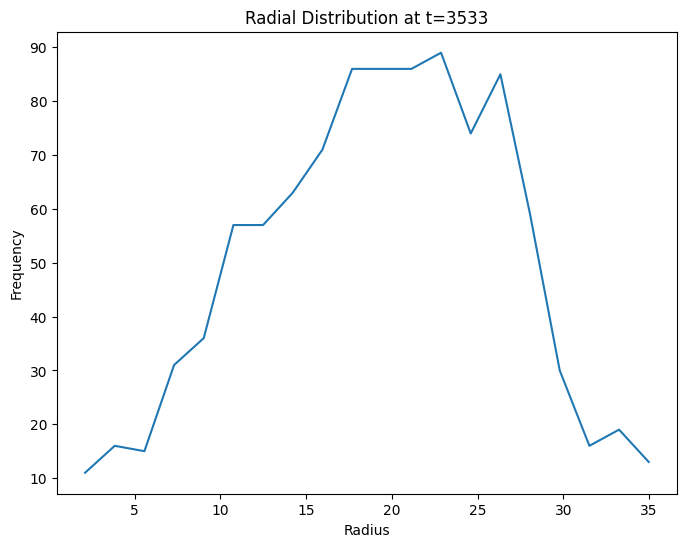

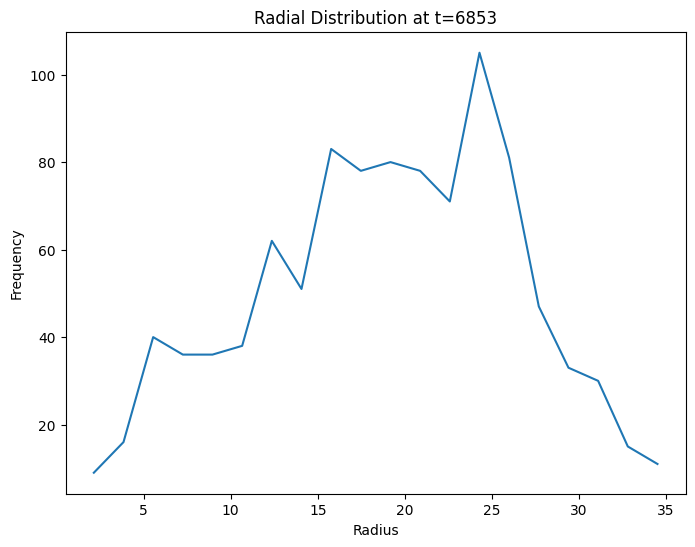

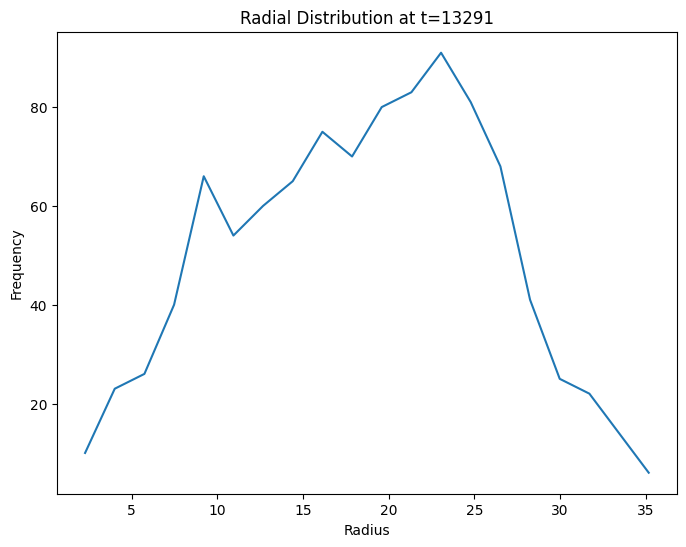

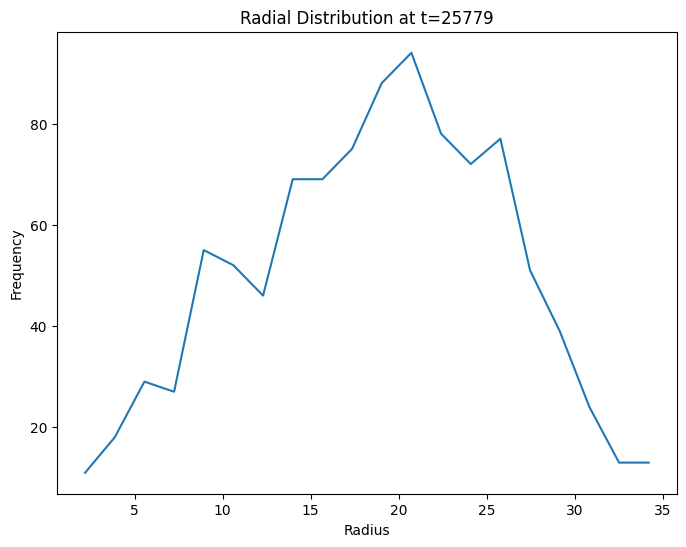

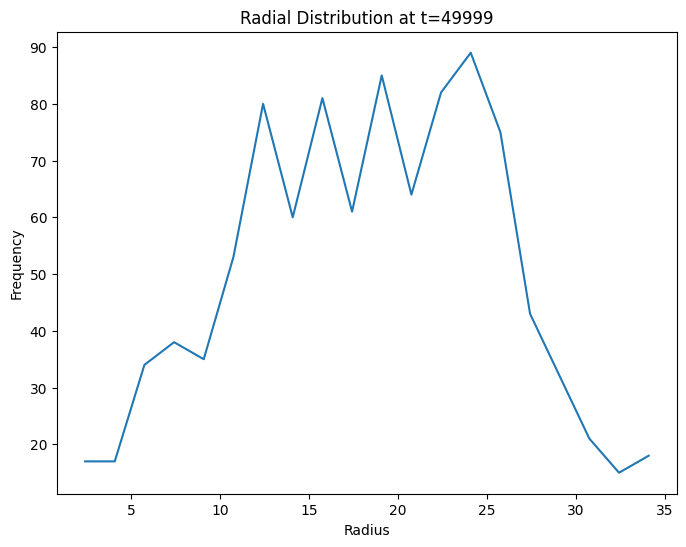

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000  # Number of particles
lattice_size = 50  # Lattice size
kq = 1  # Constant for force calculation
dt = 0.01  # Time step
noise_strength = 0.25  # Noise strength
max_steps = 50000  # Maximum number of simulation steps

# Generate initial positions uniformly distributed across the lattice
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2

positions_store = {}  # Dictionary to store positions at log-spaced times
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=50).astype(int))

def apply_periodic_boundary_conditions(positions, size):
    """Apply periodic boundary conditions to keep particles within the lattice."""
    return np.mod(positions + size / 2, size) - size / 2

for step in range(1, max_steps + 1):
    r = np.linalg.norm(positions, axis=1)
    # Avoid divisions by very small numbers near the singularity
    safe_r = np.where(r < 1e-10, 1e-10, r)
    force_direction = -positions / safe_r[:, None]
    force_magnitude = kq / safe_r
    acceleration = force_magnitude[:, None] * force_direction
    random_noise = noise_strength * np.random.randn(N, 2)
    positions += acceleration * dt + random_noise
    
    # Apply periodic boundary conditions
    positions = apply_periodic_boundary_conditions(positions, lattice_size)

    if step in store_times:
        positions_store[step] = positions.copy()

def plot_radial_distribution_at_times(times):
    for time in times:
        positions = positions_store[time]
        r = np.linalg.norm(positions, axis=1)
        plt.figure(figsize=(8, 6))
        hist, bins = np.histogram(r, bins=20)
        plt.plot(bins[1:], hist)
        plt.title(f'Radial Distribution at t={time}')
        plt.xlabel('Radius')
        plt.ylabel('Frequency')
        plt.show()

plot_radial_distribution_at_times(store_times[::10])


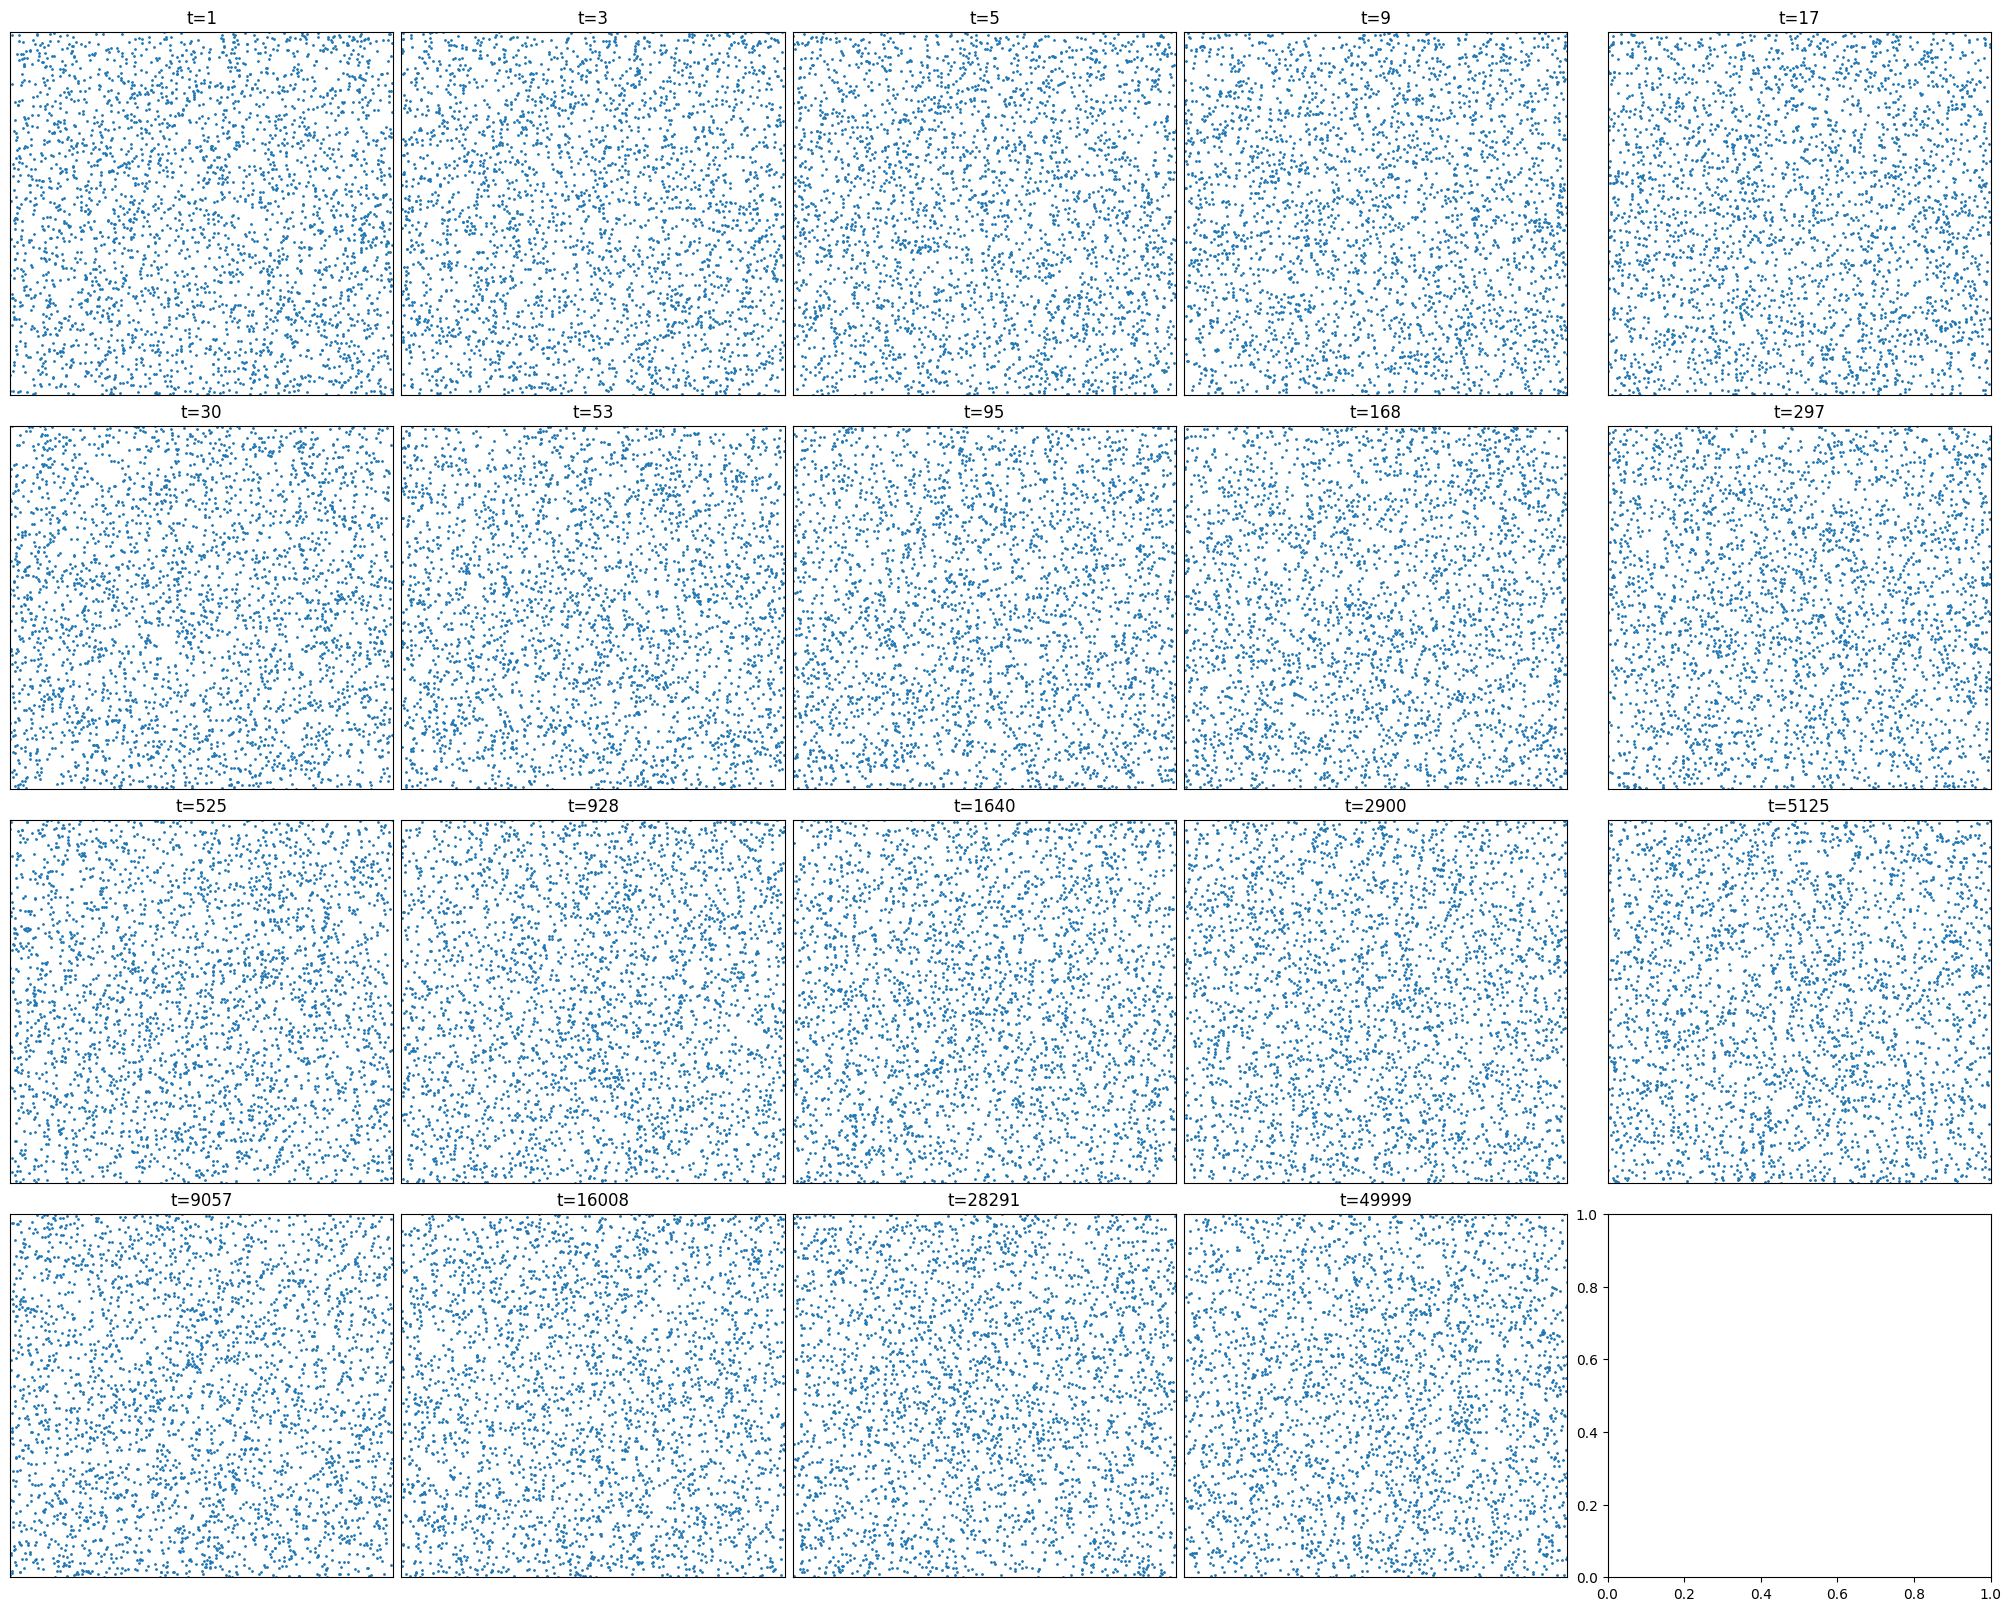

In [50]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
lattice_size = 100
kq = 10
dt = 0.01
noise_strength = 2
max_steps = 50000
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, size):
    return np.mod(pos + size / 2, size) - size / 2

for step in range(1, max_steps + 1):
    r = np.sqrt(np.sum(positions**2, axis=1))
    force_dir = -positions / r[:, None]
    force_mag = kq / r
    force = force_mag[:, None] * force_dir
    positions += dt * force + noise_strength * np.random.randn(N, 2)
    positions = apply_pbc(positions, lattice_size)
    if step in store_times:
        positions_store[step] = positions.copy()

fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, step in zip(axes.flat, store_times):
    ax.scatter(positions_store[step][:, 0], positions_store[step][:, 1], s=1)
    ax.set_title(f't={step}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


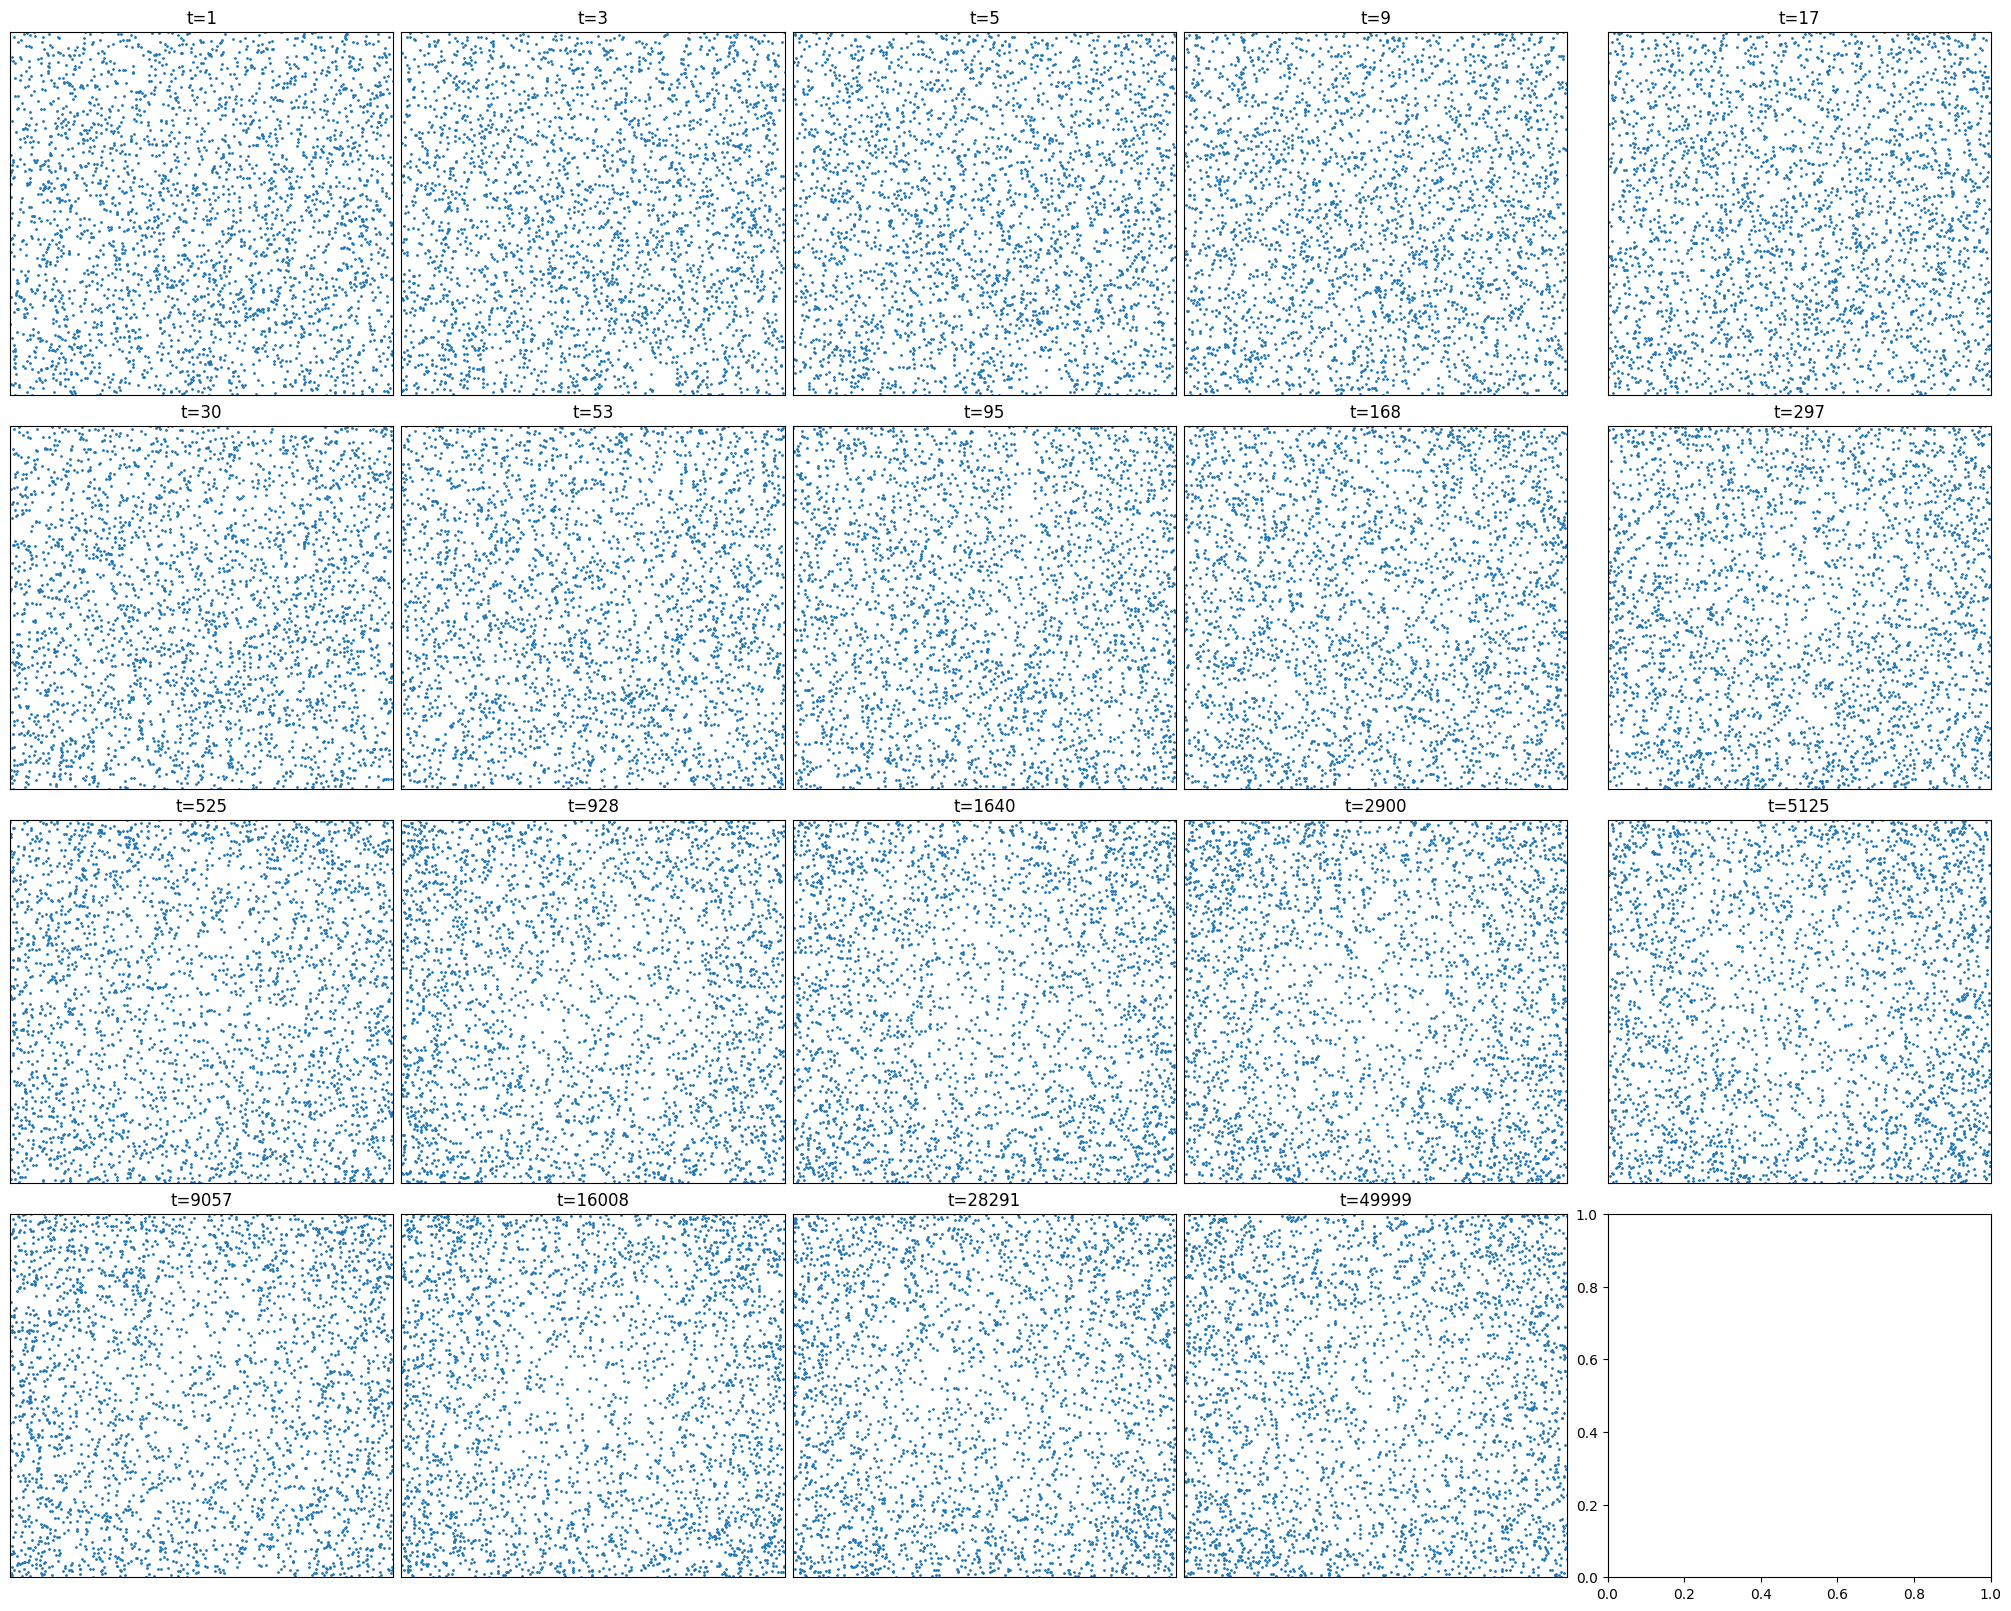

In [55]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
lattice_size = 100
kq = 10  # Adjusted for visible effect of the potential
dt = 0.01
noise_strength = 1
max_steps = 50000
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, size):
    return np.mod(pos + size / 2, size) - size / 2

for step in range(1, max_steps + 1):
    r = np.linalg.norm(positions, axis=1)
    force_direction = positions / r[:, None]
    # Correct application of force due to logarithmic potential
    force = kq * force_direction  # The magnitude is kq, and direction is towards the origin
    positions += dt * force + noise_strength * np.random.randn(N, 2)
    positions = apply_pbc(positions, lattice_size)
    if step in store_times:
        positions_store[step] = positions.copy()

fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, step in zip(axes.flat, store_times):
    ax.scatter(positions_store[step][:, 0], positions_store[step][:, 1], s=1)
    ax.set_title(f't={step}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [56]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
lattice_size = 100
particle_radius = 0.5  # Assuming a certain radius to define non-overlapping condition
kq = 1
dt = 0.01
noise_strength = 1
max_steps = 5000
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, size):
    return np.mod(pos + size / 2, size) - size / 2

def prevent_overlap(positions, min_distance):
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            distance = np.linalg.norm(positions[i] - positions[j])
            if distance < min_distance:
                direction = (positions[i] - positions[j]) / distance
                overlap = min_distance - distance
                positions[i] += direction * overlap / 2
                positions[j] -= direction * overlap / 2
    return positions

for step in range(1, max_steps + 1):
    r = np.linalg.norm(positions, axis=1)
    force_direction = positions / r[:, None]
    force = kq * force_direction
    positions += dt * force + noise_strength * np.random.randn(N, 2)
    positions = apply_pbc(positions, lattice_size)
    positions = prevent_overlap(positions, 2 * particle_radius)
    if step in store_times:
        positions_store[step] = positions.copy()

fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, step in zip(axes.flat, store_times):
    ax.scatter(positions_store[step][:, 0], positions_store[step][:, 1], s=1)
    ax.set_title(f't={step}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 3000
lattice_size = 100
kq = 1
dt = 0.01
noise_strength = 1
max_steps = 50000
min_dist = 2.0  # Approximate minimum distance to consider non-overlapping

# Initialize positions
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, lattice_size):
    return (pos + lattice_size / 2) % lattice_size - lattice_size / 2

# Store initial positions
positions_store[0] = positions.copy()

# Simulation loop
for step in range(1, max_steps + 1):
    # Calculate movement
    noise = noise_strength * np.random.randn(N, 2)
    displacement = dt * kq * (positions / np.linalg.norm(positions, axis=1, keepdims=True)) + noise
    new_positions = positions + displacement

    # Apply periodic boundary conditions
    new_positions = apply_pbc(new_positions, lattice_size)

    # Attempt to revert moves that cause overlaps
    for i in range(N):
        for j in range(i + 1, N):
            if np.linalg.norm(new_positions[i] - new_positions[j]) < min_dist:
                new_positions[i] = positions[i]
                new_positions[j] = positions[j]

    positions = new_positions.copy()

    if step in store_times:
        positions_store[step] = positions.copy()

# Plotting
fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, time in zip(axes.flat, sorted(positions_store.keys())):
    ax.scatter(positions_store[time][:, 0], positions_store[time][:, 1], s=1)
    ax.set_title(f't={time}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.axis('off')
plt.show()
